Ng Qi Xuan (31861172)

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

## Base model

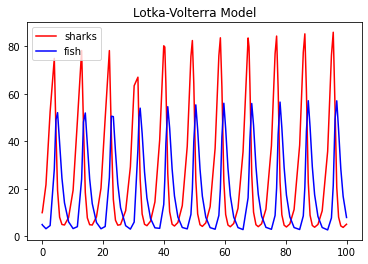

In [7]:
def LV_generator(s, r, f, alpha, beta):
    dydt = lambda xy: (s-f)*xy[1] + beta*xy[0]*xy[1]
    dxdt = lambda xy: (r-f)*xy[0] - alpha*xy[0]*xy[1]
    
    def LV(t, y):
        return [dxdt(y), dydt(y)]
    
    return LV

params = {'r': 0.8, 's': -0.8, 'f': 0.0001, 'alpha': 0.045, 'beta': 0.03}
LV = LV_generator(**params)
t_span = (0, 100)
y0 = np.array([10, 5])
bunch = solve_ivp(fun=LV, t_span=t_span, y0=y0)
t = bunch['t']
x, y = bunch['y']
plt.plot(t, x, label='sharks', c='r')
plt.plot(t, y, label='fish', c='b')
plt.title('Lotka-Volterra Model')
plt.legend()

## Model extension equations for Allee effect

\
\begin{align*}
\frac{dx}{dt} &= \frac{rx}{\beta + x}  x  (1 - x) - a  x  y \\
\frac{dy}{dt} &= a  y  (x - y)
\end{align*}
\

## Lotka-Volterra model with Allee effects

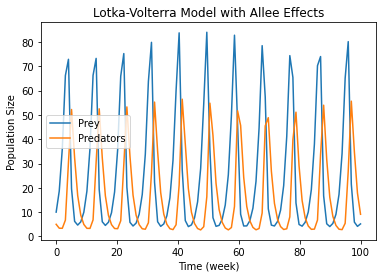

In [10]:
def LV_with_Allee(t, y, r, s, f, alpha, beta, threshold):
    if y[0] < threshold:
        dydt = alpha * y[1] * (y[0] - y[1])
        dxdt = (r * y[0] / (beta + y[0])) * (1 - y[0]) - alpha * y[0] * y[1]
    else:
        dydt = (s - f) * y[1] + beta * y[0] * y[1]
        dxdt = (r - f) * y[0] - alpha * y[0] * y[1]
    
    return [dxdt, dydt]

# Parameters
params = {
    'r': 0.8,       # Intrinsic growth rate of prey
    's': -0.8,      # Intrinsic growth rate of predators
    'f': 0.0001,    # Fraction of prey/predator caught
    'alpha': 0.045, # prop. constant of prey being eaten by predator
    'beta': 0.03,   # prop. constant of predator surviving by eating prey
    'threshold': 1  # Allee effect threshold for prey
}

# Solve the differential equations
t_span = (0, 100)
y0 = [10, 5]
solution = solve_ivp(lambda t, y: LV_with_Allee(t, y, **params), t_span, y0, t_eval=np.linspace(t_span[0], t_span[1], 100))

# Plot the results
plt.plot(solution.t, solution.y[0], label='Prey')
plt.plot(solution.t, solution.y[1], label='Predators')
plt.xlabel('Time (week)')
plt.ylabel('Population Size')
plt.title('Lotka-Volterra Model with Allee Effects')
plt.legend()
plt.show()

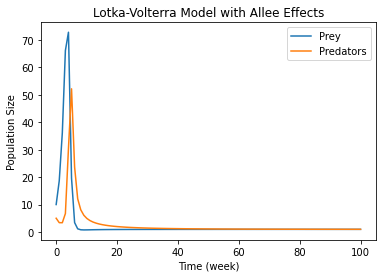

In [11]:
def LV_with_Allee(t, y, r, s, f, alpha, beta, threshold):
    if y[0] < threshold:
        dydt = alpha * y[1] * (y[0] - y[1])
        dxdt = (r * y[0] / (beta + y[0])) * (1 - y[0]) - alpha * y[0] * y[1]
    else:
        dydt = (s - f) * y[1] + beta * y[0] * y[1]
        dxdt = (r - f) * y[0] - alpha * y[0] * y[1]
    
    return [dxdt, dydt]

# Parameters
params = {
    'r': 0.8,       # Intrinsic growth rate of prey
    's': -0.8,      # Intrinsic growth rate of predators
    'f': 0.0001,    # Fraction of prey/predator caught
    'alpha': 0.045, # prop. constant of prey being eaten by predator
    'beta': 0.03,   # prop. constant of predator surviving by eating prey
    'threshold': 10  # Allee effect threshold for prey
}

# Solve the differential equations
t_span = (0, 100)
y0 = [10, 5]
solution = solve_ivp(lambda t, y: LV_with_Allee(t, y, **params), t_span, y0, t_eval=np.linspace(t_span[0], t_span[1], 100))

# Plot the results
plt.plot(solution.t, solution.y[0], label='Prey')
plt.plot(solution.t, solution.y[1], label='Predators')
plt.xlabel('Time (week)')
plt.ylabel('Population Size')
plt.title('Lotka-Volterra Model with Allee Effects')
plt.legend()
plt.show()

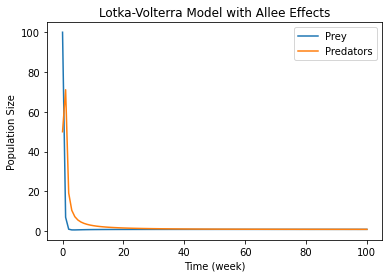

In [12]:
def LV_with_Allee(t, y, r, s, f, alpha, beta, threshold):
    if y[0] < threshold:
        dydt = alpha * y[1] * (y[0] - y[1])
        dxdt = (r * y[0] / (beta + y[0])) * (1 - y[0]) - alpha * y[0] * y[1]
    else:
        dydt = (s - f) * y[1] + beta * y[0] * y[1]
        dxdt = (r - f) * y[0] - alpha * y[0] * y[1]
    
    return [dxdt, dydt]

# Parameters
params = {
    'r': 0.8,       # Intrinsic growth rate of prey
    's': -0.8,      # Intrinsic growth rate of predators
    'f': 0.0001,    # Fraction of prey/predator caught
    'alpha': 0.045, # prop. constant of prey being eaten by predator
    'beta': 0.03,   # prop. constant of predator surviving by eating prey
    'threshold': 5  # Allee effect threshold for prey
}

# Solve the differential equations
t_span = (0, 100)
y0 = [100, 50]
solution = solve_ivp(lambda t, y: LV_with_Allee(t, y, **params), t_span, y0, t_eval=np.linspace(t_span[0], t_span[1], 100))

# Plot the results
plt.plot(solution.t, solution.y[0], label='Prey')
plt.plot(solution.t, solution.y[1], label='Predators')
plt.xlabel('Time (week)')
plt.ylabel('Population Size')
plt.title('Lotka-Volterra Model with Allee Effects')
plt.legend()
plt.show()

## Lotka-Volterra model with Allee effects and stochastic growth rate

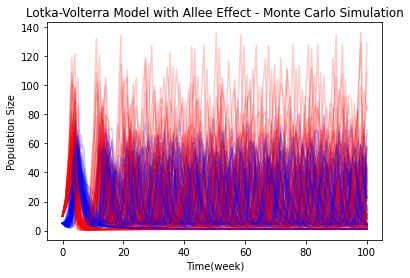

In [8]:
n=100

def LV_with_Allee(t, y, r, s, f, alpha, beta, threshold):
    if y[0] < threshold:
        dydt = alpha * y[1] * (y[0] - y[1])
        dxdt = (r * y[0] / (beta + y[0])) * (1 - y[0]) - alpha * y[0] * y[1]
    else:
        dydt = (s - f) * y[1] + beta * y[0] * y[1]
        dxdt = (r - f) * y[0] - alpha * y[0] * y[1]

    return [dxdt, dydt]

# Define the parameter distributions for Monte Carlo simulation
param_distributions = {
    'r': np.random.normal(loc=0.8, scale=0.1, size=n),     # Normal distribution
    's': np.random.uniform(low=-1.0, high=0.0, size=n),    # Uniform distribution
    'f': np.random.exponential(scale=0.0005, size=n),      # Exponential distribution
    'alpha': np.random.normal(loc=0.045, scale=0.005, size=n),
    'beta': np.random.normal(loc=0.03, scale=0.005, size=n),
    'threshold': np.random.uniform(low=1, high=1, size=n)   # Will return an array of 1
}

# Perform Monte Carlo simulation
results = []

for i in range(n):
    params = {
        'r': param_distributions['r'][i],
        's': param_distributions['s'][i],
        'f': param_distributions['f'][i],
        'alpha': param_distributions['alpha'][i],
        'beta': param_distributions['beta'][i],
        'threshold': param_distributions['threshold'][i]
    }

    t_span = (0, 100)
    y0 = [10, 5]
    solution = solve_ivp(lambda t, y: LV_with_Allee(t, y, **params), t_span, y0, t_eval=np.linspace(t_span[0], t_span[1], 100))
    results.append((solution.t, solution.y[0], solution.y[1]))

# Plot the Monte Carlo simulation results
for t, x, y in results:
    plt.plot(t, x, c='r', alpha=0.2)
    plt.plot(t, y, c='b', alpha=0.2)

plt.xlabel('Time(week)')
plt.ylabel('Population Size')
plt.title('Lotka-Volterra Model with Allee Effect - Monte Carlo Simulation')
plt.show()

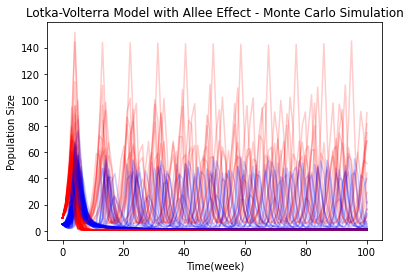

In [13]:
n=100

def LV_with_Allee(t, y, r, s, f, alpha, beta, threshold):
    if y[0] < threshold:
        dydt = alpha * y[1] * (y[0] - y[1])
        dxdt = (r * y[0] / (beta + y[0])) * (1 - y[0]) - alpha * y[0] * y[1]
    else:
        dydt = (s - f) * y[1] + beta * y[0] * y[1]
        dxdt = (r - f) * y[0] - alpha * y[0] * y[1]

    return [dxdt, dydt]

# Define the parameter distributions for Monte Carlo simulation
param_distributions = {
    'r': np.random.normal(loc=0.8, scale=0.1, size=n),     # Normal distribution
    's': np.random.uniform(low=-1.0, high=0.0, size=n),    # Uniform distribution
    'f': np.random.exponential(scale=0.0005, size=n),      # Exponential distribution
    'alpha': np.random.normal(loc=0.045, scale=0.005, size=n),
    'beta': np.random.normal(loc=0.03, scale=0.005, size=n),
    'threshold': np.random.uniform(low=5, high=5, size=n)   # Will return an array of 5
}

# Perform Monte Carlo simulation
results = []

for i in range(n):
    params = {
        'r': param_distributions['r'][i],
        's': param_distributions['s'][i],
        'f': param_distributions['f'][i],
        'alpha': param_distributions['alpha'][i],
        'beta': param_distributions['beta'][i],
        'threshold': param_distributions['threshold'][i]
    }

    t_span = (0, 100)
    y0 = [10, 5]
    solution = solve_ivp(lambda t, y: LV_with_Allee(t, y, **params), t_span, y0, t_eval=np.linspace(t_span[0], t_span[1], 100))
    results.append((solution.t, solution.y[0], solution.y[1]))

# Plot the Monte Carlo simulation results
for t, x, y in results:
    plt.plot(t, x, c='r', alpha=0.2)
    plt.plot(t, y, c='b', alpha=0.2)

plt.xlabel('Time(week)')
plt.ylabel('Population Size')
plt.title('Lotka-Volterra Model with Allee Effect - Monte Carlo Simulation')
plt.show()

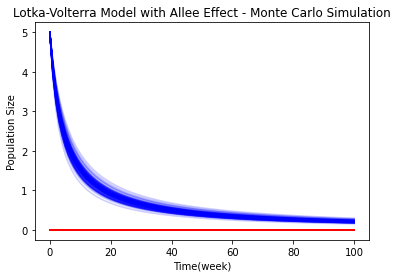

In [14]:
n=100

def LV_with_Allee(t, y, r, s, f, alpha, beta, threshold):
    if y[0] < threshold:
        dydt = alpha * y[1] * (y[0] - y[1])
        dxdt = (r * y[0] / (beta + y[0])) * (1 - y[0]) - alpha * y[0] * y[1]
    else:
        dydt = (s - f) * y[1] + beta * y[0] * y[1]
        dxdt = (r - f) * y[0] - alpha * y[0] * y[1]

    return [dxdt, dydt]

# Define the parameter distributions for Monte Carlo simulation
param_distributions = {
    'r': np.random.normal(loc=0.8, scale=0.1, size=n),     # Normal distribution
    's': np.random.uniform(low=-1.0, high=0.0, size=n),    # Uniform distribution
    'f': np.random.exponential(scale=0.0005, size=n),      # Exponential distribution
    'alpha': np.random.normal(loc=0.045, scale=0.005, size=n),
    'beta': np.random.normal(loc=0.03, scale=0.005, size=n),
    'threshold': np.random.uniform(low=1, high=1, size=n)   # Will return an array of 1
}

# Perform Monte Carlo simulation
results = []

for i in range(n):
    params = {
        'r': param_distributions['r'][i],
        's': param_distributions['s'][i],
        'f': param_distributions['f'][i],
        'alpha': param_distributions['alpha'][i],
        'beta': param_distributions['beta'][i],
        'threshold': param_distributions['threshold'][i]
    }

    t_span = (0, 100)
    y0 = [0, 5]
    solution = solve_ivp(lambda t, y: LV_with_Allee(t, y, **params), t_span, y0, t_eval=np.linspace(t_span[0], t_span[1], 100))
    results.append((solution.t, solution.y[0], solution.y[1]))

# Plot the Monte Carlo simulation results
for t, x, y in results:
    plt.plot(t, x, c='r', alpha=0.2)
    plt.plot(t, y, c='b', alpha=0.2)

plt.xlabel('Time(week)')
plt.ylabel('Population Size')
plt.title('Lotka-Volterra Model with Allee Effect - Monte Carlo Simulation')
plt.show()

## Game theory and Hueristics

### Maximum optimal (nash equilibrium) solution

Nash Equilibrium Strategies:
Prey Strategy: In a school
Predator Strategy: Hunt Aggressively
Objective Value: 15


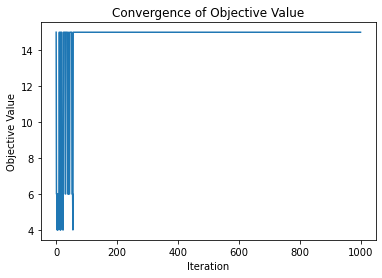

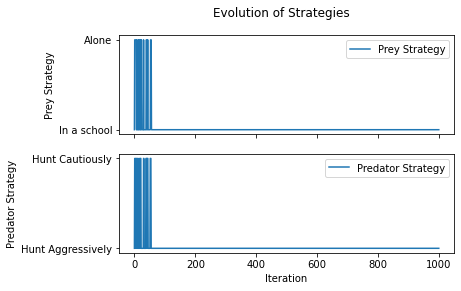

In [2]:
# Define the payoff matrices for prey and predator strategies
prey_payoff_matrix = np.array([[7, 3], [1, 2]])
predator_payoff_matrix = np.array([[8, 3], [3, 4]])


# Define the objective function
def objective_function(prey_strategy, predator_strategy):
    # Assign the corresponding payoff values based on the strategy combination
    prey_payoff = prey_payoff_matrix[prey_strategy][predator_strategy]
    predator_payoff = predator_payoff_matrix[prey_strategy][predator_strategy]
    
    # Calculate the objective value as a combination of the payoff values
    objective_value = prey_payoff + predator_payoff
    
    return objective_value

# Define the simulated annealing algorithm
def simulated_annealing():
    # Set initial temperature, cooling rate, and maximum number of iterations
    initial_temperature = 100.0
    cooling_rate = 0.95
    max_iterations = 1000
    
    # Set the initial strategy combination for prey and predator
    initial_prey_strategy = 0  # 0 corresponds to "In a school"
    initial_predator_strategy = 0  # 0 corresponds to "Hunt Aggressively"
    
    # Initialize the current state and objective value
    current_prey_strategy = initial_prey_strategy
    current_predator_strategy = initial_predator_strategy
    current_objective = objective_function(current_prey_strategy, current_predator_strategy)
    
    # Initialize the best state and objective value
    best_prey_strategy = current_prey_strategy
    best_predator_strategy = current_predator_strategy
    best_objective = current_objective
    
    # Initialize the temperature
    temperature = initial_temperature
    
    # Initialize the iteration counter
    iteration = 0
    
    # Define lists to store the objective values and strategies at each iteration
    objective_values = []
    prey_strategies = []
    predator_strategies = []
    
    # Perform simulated annealing
    while temperature > 0 and iteration < max_iterations:
        # Append the objective value and strategies at each iteration to the lists
        objective_values.append(current_objective)
        prey_strategies.append(current_prey_strategy)
        predator_strategies.append(current_predator_strategy)
        
        # Generate a neighboring state by randomly perturbing the current state
        # For example, randomly change the strategy of prey or predator
        new_prey_strategy = np.random.randint(2)  # 2 is the number of strategies for prey
        new_predator_strategy = np.random.randint(2)  # 2 is the number of strategies for predator
        
        # Evaluate the objective value of the neighboring state
        neighboring_objective = objective_function(new_prey_strategy, new_predator_strategy)
        
        # Determine whether to accept the neighboring state
        if neighboring_objective > current_objective:
            current_prey_strategy = new_prey_strategy
            current_predator_strategy = new_predator_strategy
            current_objective = neighboring_objective
        else:
            acceptance_probability = np.exp((neighboring_objective - current_objective) / temperature)
            if np.random.rand() < acceptance_probability:
                current_prey_strategy = new_prey_strategy
                current_predator_strategy = new_predator_strategy
                current_objective = neighboring_objective
        
        # Update the best state and objective value
        if current_objective > best_objective:
            best_prey_strategy = current_prey_strategy
            best_predator_strategy = current_predator_strategy
            best_objective = current_objective
        
        # Cool down the temperature
        temperature *= cooling_rate
        
        # Increment the iteration counter
        iteration += 1
    
    return best_prey_strategy, best_predator_strategy, best_objective, objective_values, prey_strategies, predator_strategies

# Run the simulated annealing algorithm to find the Nash equilibrium
best_prey_strategy, best_predator_strategy, best_objective, objective_values, prey_strategies, predator_strategies = simulated_annealing()

# Define the strategy labels for interpretation
prey_strategies_labels = ["In a school", "Alone"]
predator_strategies_labels = ["Hunt Aggressively", "Hunt Cautiously"]

# Print the results
print("Nash Equilibrium Strategies:")
print("Prey Strategy:", prey_strategies_labels[best_prey_strategy])
print("Predator Strategy:", predator_strategies_labels[best_predator_strategy])
print("Objective Value:", best_objective)

# Plot the objective values over iterations
plt.plot(range(len(objective_values)), objective_values)
plt.xlabel('Iteration')
plt.ylabel('Objective Value')
plt.title('Convergence of Objective Value')
plt.show()

# Plot the strategies of prey and predators over iterations
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
ax1.plot(range(len(prey_strategies)), [prey_strategies_labels[s] for s in prey_strategies], label='Prey Strategy')
ax1.set_ylabel('Prey Strategy')
ax1.legend()

ax2.plot(range(len(predator_strategies)), [predator_strategies_labels[s] for s in predator_strategies], label='Predator Strategy')
ax2.set_xlabel('Iteration')
ax2.set_ylabel('Predator Strategy')
ax2.legend()

plt.suptitle('Evolution of Strategies')
plt.show()


### Minimum optimal solution

Minimum Optimal Strategies:
Prey Strategy: Alone
Predator Strategy: Hunt Cautiously
Objective Value: 4


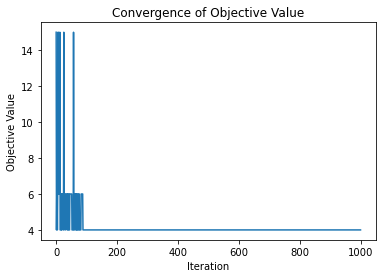

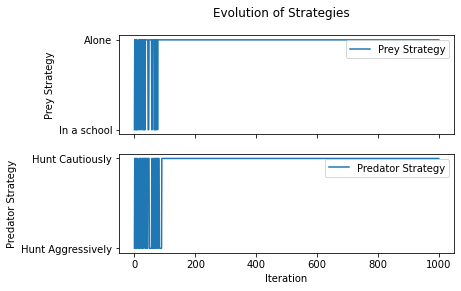

In [4]:
# Define the payoff matrices for prey and predator strategies
prey_payoff_matrix = np.array([[7, 3], [1, 2]])
predator_payoff_matrix = np.array([[8, 3], [3, 4]])

# Define the objective function
def objective_function(prey_strategy, predator_strategy):
    prey_payoff = prey_payoff_matrix[prey_strategy][predator_strategy]
    predator_payoff = predator_payoff_matrix[prey_strategy][predator_strategy]
    objective_value = prey_payoff + predator_payoff
    return objective_value

# Define the simulated annealing algorithm
def simulated_annealing():
    initial_temperature = 100.0
    cooling_rate = 0.95
    max_iterations = 1000
    initial_prey_strategy = 0
    initial_predator_strategy = 0

    current_prey_strategy = initial_prey_strategy
    current_predator_strategy = initial_predator_strategy
    current_objective = objective_function(current_prey_strategy, current_predator_strategy)

    best_prey_strategy = current_prey_strategy
    best_predator_strategy = current_predator_strategy
    best_objective = current_objective

    temperature = initial_temperature
    iteration = 0

    objective_values = []
    prey_strategies = []
    predator_strategies = []

    while temperature > 0 and iteration < max_iterations:
        objective_values.append(current_objective)
        prey_strategies.append(current_prey_strategy)
        predator_strategies.append(current_predator_strategy)

        new_prey_strategy = np.random.randint(2)
        new_predator_strategy = np.random.randint(2)
        neighboring_objective = objective_function(new_prey_strategy, current_predator_strategy)

        if neighboring_objective < current_objective:  # Accept lower objective values
            current_prey_strategy = new_prey_strategy
            current_predator_strategy = new_predator_strategy
            current_objective = neighboring_objective
        else:
            acceptance_probability = np.exp((current_objective - neighboring_objective) / temperature)
            if np.random.rand() < acceptance_probability:
                current_prey_strategy = new_prey_strategy
                current_predator_strategy = new_predator_strategy
                current_objective = neighboring_objective

        if current_objective < best_objective:  # Update for the minimum objective value
            best_prey_strategy = current_prey_strategy
            best_predator_strategy = current_predator_strategy
            best_objective = current_objective

        temperature *= cooling_rate
        iteration += 1

    return best_prey_strategy, best_predator_strategy, best_objective, objective_values, prey_strategies, predator_strategies

# Run the modified simulated annealing algorithm to find the minimum optimal solution
best_prey_strategy, best_predator_strategy, best_objective, objective_values, prey_strategies, predator_strategies = simulated_annealing()

# Define the strategy labels for interpretation
prey_strategies_labels = ["In a school", "Alone"]
predator_strategies_labels = ["Hunt Aggressively", "Hunt Cautiously"]

# Print the results
print("Minimum Optimal Strategies:")
print("Prey Strategy:", prey_strategies_labels[best_prey_strategy])
print("Predator Strategy:", predator_strategies_labels[best_predator_strategy])
print("Objective Value:", best_objective)

# Plot the objective values over iterations
plt.plot(range(len(objective_values)), objective_values)
plt.xlabel('Iteration')
plt.ylabel('Objective Value')
plt.title('Convergence of Objective Value')
plt.show()

# Plot the strategies of prey and predators over iterations
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
ax1.plot(range(len(prey_strategies)), [prey_strategies_labels[s] for s in prey_strategies], label='Prey Strategy')
ax1.set_ylabel('Prey Strategy')
ax1.legend()

ax2.plot(range(len(predator_strategies)), [predator_strategies_labels[s] for s in predator_strategies], label='Predator Strategy')
ax2.set_xlabel('Iteration')
ax2.set_ylabel('Predator Strategy')
ax2.legend()

plt.suptitle('Evolution of Strategies')
plt.show()

## Sensitivity Analysis for simulated annealing

Sensitivity Analysis:
Initial Temperature: 10.0
Cooling Rate: 0.9
Max Iterations: 500
Minimum Optimal Strategies:
Prey Strategy: Alone
Predator Strategy: Hunt Aggressively
Objective Value: 4



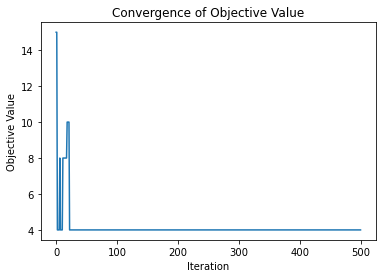

Sensitivity Analysis:
Initial Temperature: 10.0
Cooling Rate: 0.95
Max Iterations: 500
Minimum Optimal Strategies:
Prey Strategy: Alone
Predator Strategy: Hunt Aggressively
Objective Value: 4



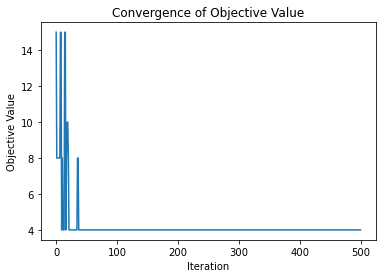

Sensitivity Analysis:
Initial Temperature: 10.0
Cooling Rate: 0.99
Max Iterations: 500
Minimum Optimal Strategies:
Prey Strategy: Alone
Predator Strategy: Hunt Aggressively
Objective Value: 4



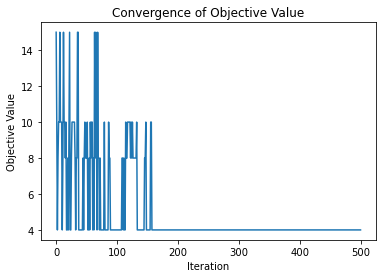

Sensitivity Analysis:
Initial Temperature: 50.0
Cooling Rate: 0.9
Max Iterations: 500
Minimum Optimal Strategies:
Prey Strategy: Alone
Predator Strategy: Hunt Aggressively
Objective Value: 4



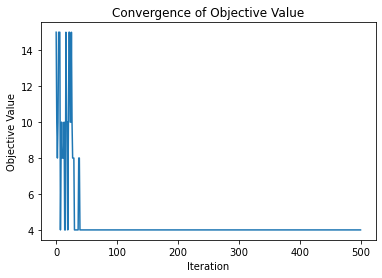

Sensitivity Analysis:
Initial Temperature: 50.0
Cooling Rate: 0.95
Max Iterations: 500
Minimum Optimal Strategies:
Prey Strategy: Alone
Predator Strategy: Hunt Aggressively
Objective Value: 4



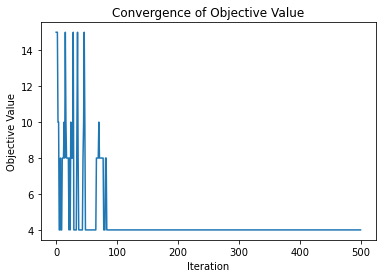

Sensitivity Analysis:
Initial Temperature: 50.0
Cooling Rate: 0.99
Max Iterations: 500
Minimum Optimal Strategies:
Prey Strategy: Alone
Predator Strategy: Hunt Aggressively
Objective Value: 4



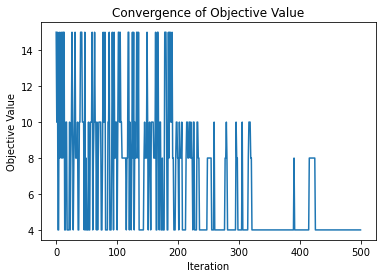

Sensitivity Analysis:
Initial Temperature: 100.0
Cooling Rate: 0.9
Max Iterations: 500
Minimum Optimal Strategies:
Prey Strategy: Alone
Predator Strategy: Hunt Aggressively
Objective Value: 4



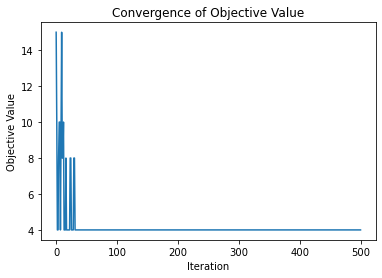

Sensitivity Analysis:
Initial Temperature: 100.0
Cooling Rate: 0.95
Max Iterations: 500
Minimum Optimal Strategies:
Prey Strategy: Alone
Predator Strategy: Hunt Aggressively
Objective Value: 4



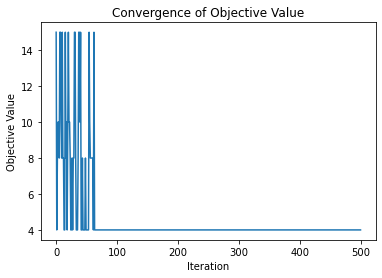

Sensitivity Analysis:
Initial Temperature: 100.0
Cooling Rate: 0.99
Max Iterations: 500
Minimum Optimal Strategies:
Prey Strategy: Alone
Predator Strategy: Hunt Aggressively
Objective Value: 4



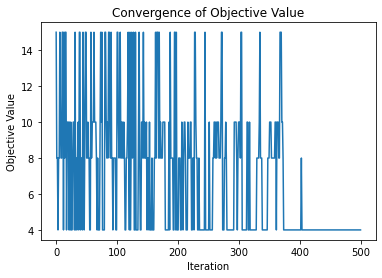

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Define the payoff matrices for prey and predator strategies
prey_payoff_matrix = np.array([[7, 3], [1, 2]])
predator_payoff_matrix = np.array([[8, 5], [3, 8]])

# Define the objective function
def objective_function(prey_strategy, predator_strategy):
    prey_payoff = prey_payoff_matrix[prey_strategy][predator_strategy]
    predator_payoff = predator_payoff_matrix[prey_strategy][predator_strategy]
    objective_value = prey_payoff + predator_payoff
    return objective_value

# Define the simulated annealing algorithm
def simulated_annealing(initial_temperature, cooling_rate, max_iterations):
    initial_prey_strategy = 0
    initial_predator_strategy = 0

    current_prey_strategy = initial_prey_strategy
    current_predator_strategy = initial_predator_strategy
    current_objective = objective_function(current_prey_strategy, current_predator_strategy)

    best_prey_strategy = current_prey_strategy
    best_predator_strategy = current_predator_strategy
    best_objective = current_objective

    temperature = initial_temperature
    iteration = 0

    objective_values = []

    while temperature > 0 and iteration < max_iterations:
        objective_values.append(current_objective)

        new_prey_strategy = np.random.randint(2)
        new_predator_strategy = np.random.randint(2)
        neighboring_objective = objective_function(new_prey_strategy, new_predator_strategy)

        if neighboring_objective < current_objective:  # Accept lower objective values
            current_prey_strategy = new_prey_strategy
            current_predator_strategy = new_predator_strategy
            current_objective = neighboring_objective
        else:
            acceptance_probability = np.exp((current_objective - neighboring_objective) / temperature)
            if np.random.rand() < acceptance_probability:
                current_prey_strategy = new_prey_strategy
                current_predator_strategy = new_predator_strategy
                current_objective = neighboring_objective

        if current_objective < best_objective:  # Update for the minimum objective value
            best_prey_strategy = current_prey_strategy
            best_predator_strategy = current_predator_strategy
            best_objective = current_objective

        temperature *= cooling_rate
        iteration += 1

    return best_prey_strategy, best_predator_strategy, best_objective, objective_values

# Define the strategy labels for interpretation
prey_strategies_labels = ["In a school", "Alone"]
predator_strategies_labels = ["Hunt Aggressively", "Hunt Cautiously"]

# Perform sensitivity analysis
initial_temperatures = [10.0, 50.0, 100.0]
cooling_rates = [0.9, 0.95, 0.99]
max_iterations_list = [500]

for initial_temperature in initial_temperatures:
    for cooling_rate in cooling_rates:
        for max_iterations in max_iterations_list:
            best_prey_strategy, best_predator_strategy, best_objective, objective_values = simulated_annealing(
                initial_temperature, cooling_rate, max_iterations
            )

            # Print the results
            print("Sensitivity Analysis:")
            print("Initial Temperature:", initial_temperature)
            print("Cooling Rate:", cooling_rate)
            print("Max Iterations:", max_iterations)
            print("Minimum Optimal Strategies:")
            print("Prey Strategy:", prey_strategies_labels[best_prey_strategy])
            print("Predator Strategy:", predator_strategies_labels[best_predator_strategy])
            print("Objective Value:", best_objective)
            print()

            # Plot the objective values over iterations
            plt.plot(range(len(objective_values)), objective_values)
            plt.xlabel('Iteration')
            plt.ylabel('Objective Value')
            plt.title('Convergence of Objective Value')
            plt.show()
